In [ ]:
# Upgrade gdown
!pip install --upgrade --no-cache-dir gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0


In [ ]:
# Import library
import zipfile, os
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Download MedicalPlants.zip dataset from google drive
import gdown
file_id = "1j7wpshoP4rf4kDDG6juW0K8vTBupsodE"
output_file = "MedicalPlantDataset.zip"
gdown.download(f"https://drive.google.com/uc?id=1j7wpshoP4rf4kDDG6juW0K8vTBupsodE", output_file)

Downloading...
From (original): https://drive.google.com/uc?id=1j7wpshoP4rf4kDDG6juW0K8vTBupsodE
From (redirected): https://drive.google.com/uc?id=1j7wpshoP4rf4kDDG6juW0K8vTBupsodE&confirm=t&uuid=f495bfe9-abb4-49c8-a708-0a5116d786b2
To: /content/MedicalPlantDataset.zip
100%|██████████| 239M/239M [00:07<00:00, 33.0MB/s]


'MedicalPlantDataset.zip'

In [ ]:
# Extracting MedicalPlant zip file
local_zip = './MedicalPlantDataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/MedicalPlant/train'
os.listdir(base_dir)

['Mint',
 'Betel',
 'Alugbati',
 'Guava',
 'Malunggay',
 'Lemon',
 'Apple Mango',
 'Oregano',
 'Langka',
 'Mango',
 'Gumamela']

In [ ]:
# Print total images in files
print('Image Alugbati amount :', len(os.listdir('/tmp/MedicalPlant/train/Alugbati')))
print('Image Guava amount :', len(os.listdir('/tmp/MedicalPlant/train/Guava')))
print('Image Langka amount :', len(os.listdir('/tmp/MedicalPlant/train/Langka')))
print('Image Mango amount :', len(os.listdir('/tmp/MedicalPlant/train/Mango')))
print('Image Lemon amount :', len(os.listdir('/tmp/MedicalPlant/train/Lemon')))
print('Image Gumamela amount :', len(os.listdir('/tmp/MedicalPlant/train/Gumamela')))
print('Image Betel amount :', len(os.listdir('/tmp/MedicalPlant/train/Betel')))
print('Image Oregano amount :', len(os.listdir('/tmp/MedicalPlant/train/Oregano')))
print('Image Apple Mango amount :', len(os.listdir('/tmp/MedicalPlant/train/Apple Mango')))
print('Image Malunggay amount :', len(os.listdir('/tmp/MedicalPlant/train/Malunggay')))
print('Image Mint amount :', len(os.listdir('/tmp/MedicalPlant/train/Mint')))

Image Alugbati amount : 660
Image Guava amount : 682
Image Langka amount : 128
Image Mango amount : 156
Image Lemon amount : 149
Image Gumamela amount : 1008
Image Betel amount : 111
Image Oregano amount : 516
Image Apple Mango amount : 2168
Image Malunggay amount : 578
Image Mint amount : 231


In [ ]:
# Count the number of images in the dataset
number_label = {}
total_files = 0
for i in os.listdir(base_dir):
    counting = len(os.listdir(os.path.join(base_dir, i)))
    number_label[i] = counting
    total_files += counting

print("Total Files : " + str(total_files))

Total Files : 6387


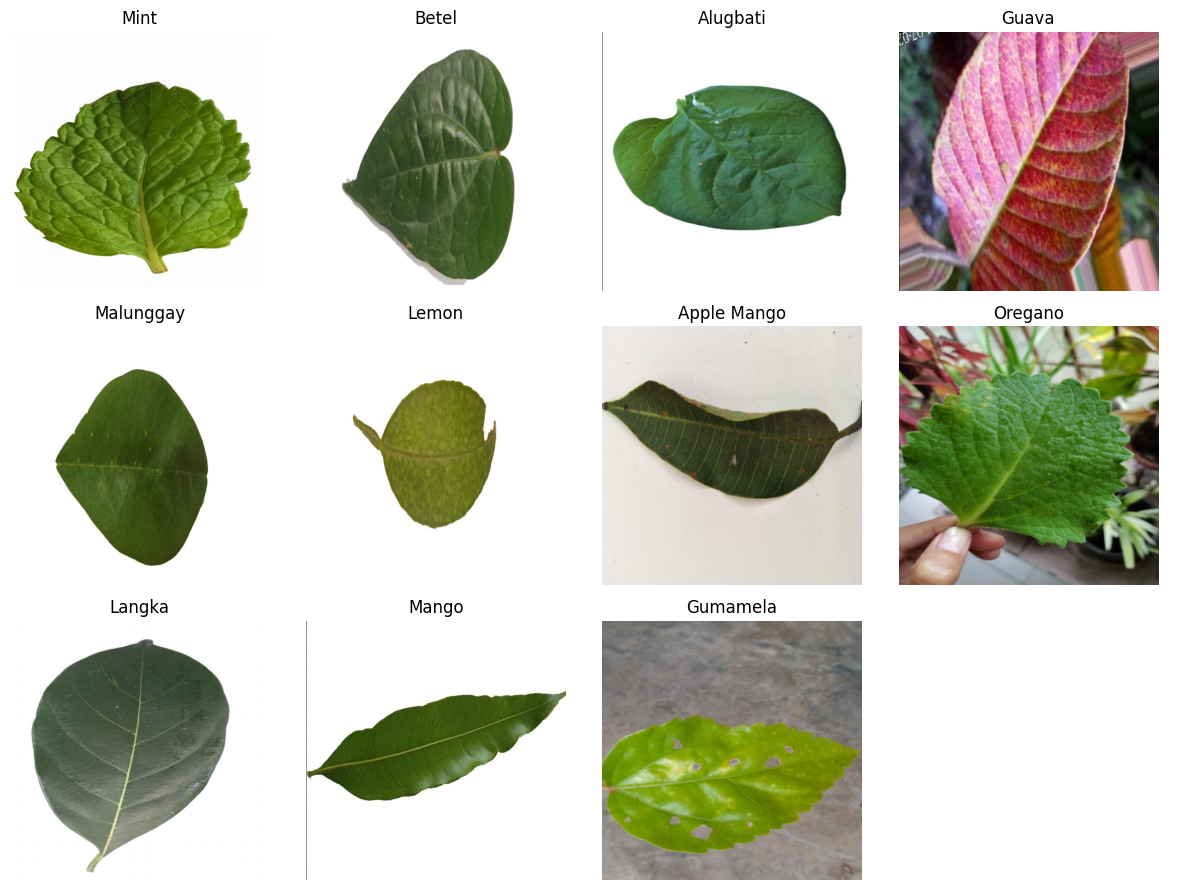

In [ ]:
# Display sample images in each class
img_each_class = 1
img_samples = {}
classes = list(number_label.keys())

fig, axes = plt.subplots(3, 4, figsize=(12, 9))

for ax in axes.flatten():
    ax.axis('off')

count = 0
for c in classes:
    temp = os.listdir(os.path.join(base_dir, c))[:img_each_class]
    for item in temp:
        img_path = os.path.join(base_dir, c, item)
        img = mpimg.imread(img_path)
        axes[count // 4, count % 4].imshow(img)
        axes[count // 4, count % 4].set_title(c)
        count += 1

plt.tight_layout()
plt.show()

In [ ]:
# Image Augmentation for duplicating image
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split = 0.2
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

In [ ]:
# Create generator classifier
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
    subset = 'validation'
)

Found 5114 images belonging to 11 classes.
Found 1273 images belonging to 11 classes.


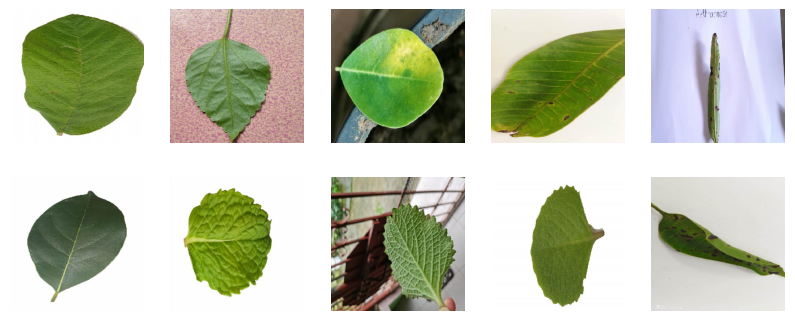

In [ ]:
# Get one batch of images and labels
augmented_images, _ = next(train_generator)

# Display the first image in the batch
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(augmented_images[i])
    plt.axis('off')
plt.show()

In [ ]:
def count_samples(generator):
    class_counts = {class_name: 0 for class_name in generator.class_indices}
    for label in generator.labels:
        class_name = list(generator.class_indices.keys())[list(generator.class_indices.values()).index(label)]
        class_counts[class_name] += 1
    return class_counts

# Hitung dan tampilkan jumlah sampel per kelas
train_class_counts = count_samples(train_generator)
validation_class_counts = count_samples(validation_generator)

print("Training Class Counts: ", train_class_counts)
print("Validation Class Counts: ", validation_class_counts)

Training Class Counts:  {'Alugbati': 528, 'Apple Mango': 1735, 'Betel': 89, 'Guava': 546, 'Gumamela': 807, 'Langka': 103, 'Lemon': 120, 'Malunggay': 463, 'Mango': 125, 'Mint': 185, 'Oregano': 413}
Validation Class Counts:  {'Alugbati': 132, 'Apple Mango': 433, 'Betel': 22, 'Guava': 136, 'Gumamela': 201, 'Langka': 25, 'Lemon': 29, 'Malunggay': 115, 'Mango': 31, 'Mint': 46, 'Oregano': 103}


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
model_layer = Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(11, activation='softmax')
])
model_layer.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 200)               5017800   
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 11)                2211      
                                                                 
Total params: 19734699 (75.28 MB)
Trainable params: 5020011 (19.15 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
# Adding an optimizer
model_layer.compile(
    loss='categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [ ]:
# Train Model
history = model_layer.fit(
    train_generator,
    epochs=10,
    validation_data = validation_generator,
    verbose=1,
)

Epoch 1/10
160/160 [==============================] - 49s 240ms/step - loss: 0.8741 - accuracy: 0.7575 - val_loss: 0.2680 - val_accuracy: 0.9254
Epoch 2/10
160/160 [==============================] - 28s 175ms/step - loss: 0.2463 - accuracy: 0.9208 - val_loss: 0.1741 - val_accuracy: 0.9450
Epoch 3/10
160/160 [==============================] - 29s 179ms/step - loss: 0.1887 - accuracy: 0.9361 - val_loss: 0.1159 - val_accuracy: 0.9623
Epoch 4/10
160/160 [==============================] - 34s 213ms/step - loss: 0.1373 - accuracy: 0.9523 - val_loss: 0.1072 - val_accuracy: 0.9599
Epoch 5/10
160/160 [==============================] - 29s 179ms/step - loss: 0.1261 - accuracy: 0.9580 - val_loss: 0.1117 - val_accuracy: 0.9615
Epoch 6/10
160/160 [==============================] - 28s 173ms/step - loss: 0.1258 - accuracy: 0.9568 - val_loss: 0.1533 - val_accuracy: 0.9544
Epoch 7/10
160/160 [==============================] - 28s 177ms/step - loss: 0.1084 - accuracy: 0.9574 - val_loss: 0.1466 - val_ac

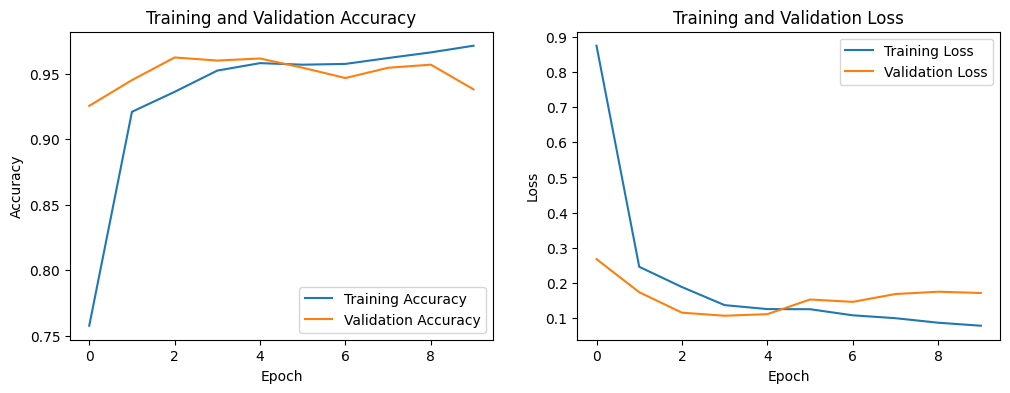

In [ ]:
#  Visualize accuracy and loss plot
accuracy     = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss         = history.history['loss']
val_loss     = history.history['val_loss']

plt.figure(figsize = (12, 4))
epochs = range(len(accuracy))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

In [ ]:
train_generator.class_indices

{'Alugbati': 0,
 'Apple Mango': 1,
 'Betel': 2,
 'Guava': 3,
 'Gumamela': 4,
 'Langka': 5,
 'Lemon': 6,
 'Malunggay': 7,
 'Mango': 8,
 'Mint': 9,
 'Oregano': 10}

Saving mint.jpeg to mint.jpeg
1/1 [==============================] - 3s 3s/step
mint.jpeg
Alugbati 0.0000
Apple Mango 0.0000
Betel 0.0000
Guava 0.0000
Gumamela 0.0000
Langka 0.0000
Lemon 0.0000
Malunggay 0.0000
Mango 0.0000
Mint 1.0000
Oregano 0.0000


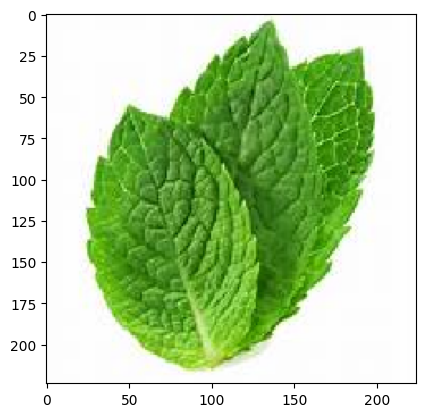

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = load_img(path, target_size=(224, 224))

  imgplot = plt.imshow(img)
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model_layer.predict(images, batch_size=8)
  print(fn)

  print('Alugbati', '{:.4f}'.format(classes[0,0]))
  print('Apple Mango', '{:.4f}'.format(classes[0,1]))
  print('Betel', '{:.4f}'.format(classes[0,2]))
  print('Guava', '{:.4f}'.format(classes[0,3]))
  print('Gumamela', '{:.4f}'.format(classes[0,4]))
  print('Langka', '{:.4f}'.format(classes[0,5]))
  print('Lemon', '{:.4f}'.format(classes[0,6]))
  print('Malunggay', '{:.4f}'.format(classes[0,7]))
  print('Mango', '{:.4f}'.format(classes[0,8]))
  print('Mint', '{:.4f}'.format(classes[0,9]))
  print('Oregano', '{:.4f}'.format(classes[0,10]))

Saving IMG 1171586503 Manggo.jpeg to IMG 1171586503 Manggo.jpeg
1/1 [==============================] - 0s 21ms/step
IMG 1171586503 Manggo.jpeg
Alugbati 0.0000
Apple Mango 0.0000
Betel 0.0000
Guava 0.0000
Gumamela 0.0000
Langka 0.0000
Lemon 0.0000
Malunggay 0.0000
Mango 1.0000
Mint 0.0000
Oregano 0.0000


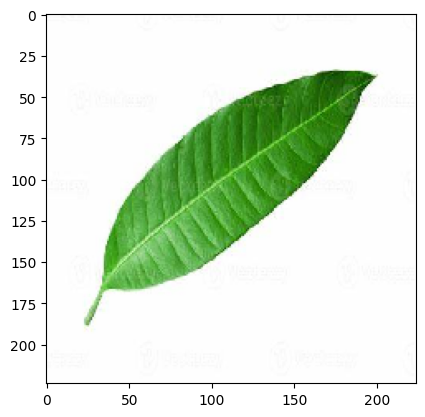

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = load_img(path, target_size=(224, 224))

  imgplot = plt.imshow(img)
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model_layer.predict(images, batch_size=8)
  print(fn)

  print('Alugbati', '{:.4f}'.format(classes[0,0]))
  print('Apple Mango', '{:.4f}'.format(classes[0,1]))
  print('Betel', '{:.4f}'.format(classes[0,2]))
  print('Guava', '{:.4f}'.format(classes[0,3]))
  print('Gumamela', '{:.4f}'.format(classes[0,4]))
  print('Langka', '{:.4f}'.format(classes[0,5]))
  print('Lemon', '{:.4f}'.format(classes[0,6]))
  print('Malunggay', '{:.4f}'.format(classes[0,7]))
  print('Mango', '{:.4f}'.format(classes[0,8]))
  print('Mint', '{:.4f}'.format(classes[0,9]))
  print('Oregano', '{:.4f}'.format(classes[0,10]))

Saving IMG 15266323 Oregano.jpeg to IMG 15266323 Oregano.jpeg
1/1 [==============================] - 0s 28ms/step
IMG 15266323 Oregano.jpeg
Alugbati 0.0000
Apple Mango 0.0000
Betel 0.0000
Guava 0.0000
Gumamela 0.0000
Langka 0.0000
Lemon 0.0000
Malunggay 0.0000
Mango 0.0000
Mint 0.0000
Oregano 1.0000


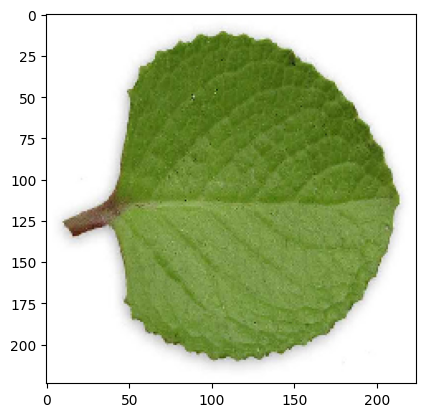

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = load_img(path, target_size=(224, 224))

  imgplot = plt.imshow(img)
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model_layer.predict(images, batch_size=8)
  print(fn)

  print('Alugbati', '{:.4f}'.format(classes[0,0]))
  print('Apple Mango', '{:.4f}'.format(classes[0,1]))
  print('Betel', '{:.4f}'.format(classes[0,2]))
  print('Guava', '{:.4f}'.format(classes[0,3]))
  print('Gumamela', '{:.4f}'.format(classes[0,4]))
  print('Langka', '{:.4f}'.format(classes[0,5]))
  print('Lemon', '{:.4f}'.format(classes[0,6]))
  print('Malunggay', '{:.4f}'.format(classes[0,7]))
  print('Mango', '{:.4f}'.format(classes[0,8]))
  print('Mint', '{:.4f}'.format(classes[0,9]))
  print('Oregano', '{:.4f}'.format(classes[0,10]))

Saving IMG 15266318 Gumamela.jpeg to IMG 15266318 Gumamela.jpeg
1/1 [==============================] - 0s 31ms/step
IMG 15266318 Gumamela.jpeg
Alugbati 0.0000
Apple Mango 0.0000
Betel 0.0000
Guava 0.0000
Gumamela 1.0000
Langka 0.0000
Lemon 0.0000
Malunggay 0.0000
Mango 0.0000
Mint 0.0000
Oregano 0.0000


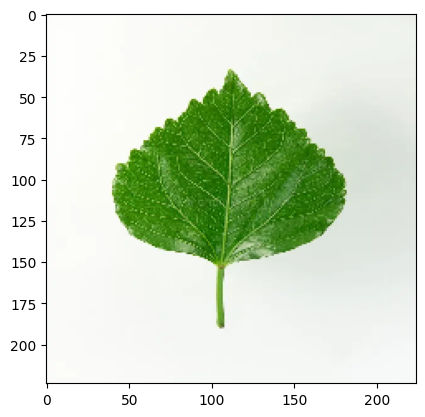

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = load_img(path, target_size=(224, 224))

  imgplot = plt.imshow(img)
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model_layer.predict(images, batch_size=8)
  print(fn)

  print('Alugbati', '{:.4f}'.format(classes[0,0]))
  print('Apple Mango', '{:.4f}'.format(classes[0,1]))
  print('Betel', '{:.4f}'.format(classes[0,2]))
  print('Guava', '{:.4f}'.format(classes[0,3]))
  print('Gumamela', '{:.4f}'.format(classes[0,4]))
  print('Langka', '{:.4f}'.format(classes[0,5]))
  print('Lemon', '{:.4f}'.format(classes[0,6]))
  print('Malunggay', '{:.4f}'.format(classes[0,7]))
  print('Mango', '{:.4f}'.format(classes[0,8]))
  print('Mint', '{:.4f}'.format(classes[0,9]))
  print('Oregano', '{:.4f}'.format(classes[0,10]))

Saving IMG 15266316 Betel.jpeg to IMG 15266316 Betel.jpeg
1/1 [==============================] - 0s 64ms/step
IMG 15266316 Betel.jpeg
Alugbati 0.0000
Apple Mango 0.0000
Betel 1.0000
Guava 0.0000
Gumamela 0.0000
Langka 0.0000
Lemon 0.0000
Malunggay 0.0000
Mango 0.0000
Mint 0.0000
Oregano 0.0000


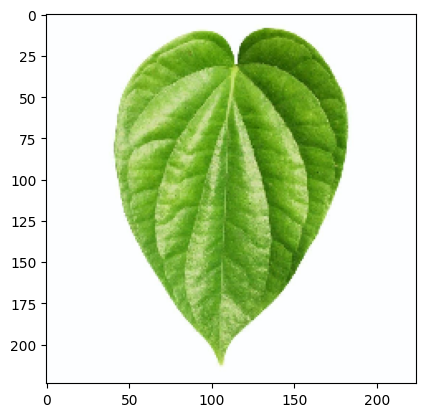

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = load_img(path, target_size=(224, 224))

  imgplot = plt.imshow(img)
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model_layer.predict(images, batch_size=8)
  print(fn)

  print('Alugbati', '{:.4f}'.format(classes[0,0]))
  print('Apple Mango', '{:.4f}'.format(classes[0,1]))
  print('Betel', '{:.4f}'.format(classes[0,2]))
  print('Guava', '{:.4f}'.format(classes[0,3]))
  print('Gumamela', '{:.4f}'.format(classes[0,4]))
  print('Langka', '{:.4f}'.format(classes[0,5]))
  print('Lemon', '{:.4f}'.format(classes[0,6]))
  print('Malunggay', '{:.4f}'.format(classes[0,7]))
  print('Mango', '{:.4f}'.format(classes[0,8]))
  print('Mint', '{:.4f}'.format(classes[0,9]))
  print('Oregano', '{:.4f}'.format(classes[0,10]))

Saving IMG 1171580065 Malunggay.jpeg to IMG 1171580065 Malunggay.jpeg
1/1 [==============================] - 0s 19ms/step
IMG 1171580065 Malunggay.jpeg
Alugbati 0.0000
Apple Mango 0.0000
Betel 0.0000
Guava 0.0000
Gumamela 0.0000
Langka 0.0000
Lemon 0.0000
Malunggay 1.0000
Mango 0.0000
Mint 0.0000
Oregano 0.0000


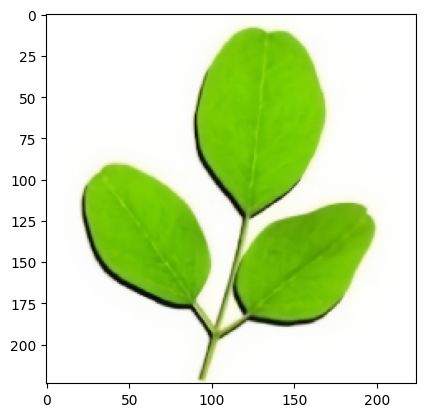

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = load_img(path, target_size=(224, 224))

  imgplot = plt.imshow(img)
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model_layer.predict(images, batch_size=8)
  print(fn)

  print('Alugbati', '{:.4f}'.format(classes[0,0]))
  print('Apple Mango', '{:.4f}'.format(classes[0,1]))
  print('Betel', '{:.4f}'.format(classes[0,2]))
  print('Guava', '{:.4f}'.format(classes[0,3]))
  print('Gumamela', '{:.4f}'.format(classes[0,4]))
  print('Langka', '{:.4f}'.format(classes[0,5]))
  print('Lemon', '{:.4f}'.format(classes[0,6]))
  print('Malunggay', '{:.4f}'.format(classes[0,7]))
  print('Mango', '{:.4f}'.format(classes[0,8]))
  print('Mint', '{:.4f}'.format(classes[0,9]))
  print('Oregano', '{:.4f}'.format(classes[0,10]))

Saving IMG 6272274282422462 Alugbati.jpeg to IMG 6272274282422462 Alugbati.jpeg
1/1 [==============================] - 0s 19ms/step
IMG 6272274282422462 Alugbati.jpeg
Alugbati 1.0000
Apple Mango 0.0000
Betel 0.0000
Guava 0.0000
Gumamela 0.0000
Langka 0.0000
Lemon 0.0000
Malunggay 0.0000
Mango 0.0000
Mint 0.0000
Oregano 0.0000


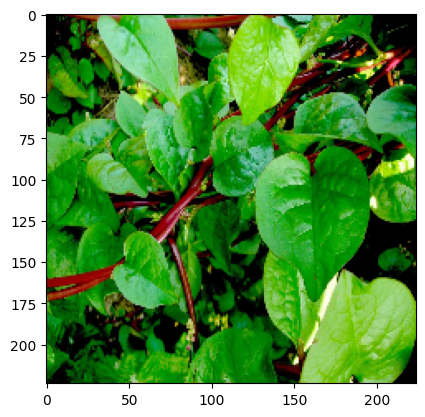

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = load_img(path, target_size=(224, 224))

  imgplot = plt.imshow(img)
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model_layer.predict(images, batch_size=8)
  print(fn)

  print('Alugbati', '{:.4f}'.format(classes[0,0]))
  print('Apple Mango', '{:.4f}'.format(classes[0,1]))
  print('Betel', '{:.4f}'.format(classes[0,2]))
  print('Guava', '{:.4f}'.format(classes[0,3]))
  print('Gumamela', '{:.4f}'.format(classes[0,4]))
  print('Langka', '{:.4f}'.format(classes[0,5]))
  print('Lemon', '{:.4f}'.format(classes[0,6]))
  print('Malunggay', '{:.4f}'.format(classes[0,7]))
  print('Mango', '{:.4f}'.format(classes[0,8]))
  print('Mint', '{:.4f}'.format(classes[0,9]))
  print('Oregano', '{:.4f}'.format(classes[0,10]))